<a href="https://colab.research.google.com/github/dottorm/teaching_synthetic/blob/main/synthetic_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Installing the package to generate synthetic data

In [41]:
!pip install sdv

import required libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

download the dataset and populate pandas dataframe

In [43]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [
        'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
        'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'
    ]
data = pd.read_csv(url, names=column_names,na_values='?')

print(data.head())
print('----------------------\n')
print('DataFrame INFO')
print(data.info())
print('----------------------\n')
print('Count null values')
print(data.isnull().sum())

  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income Approved  
0    202.0       0        +  
1     43.0     560        +  
2    280

Check categorical columns

Normalize 'Approved' column


In [44]:
categorical = [var for var in data.columns if data[var].dtype == 'O']
print(" There are {} categorical variables \n".format(len(categorical)))
print(" The Categorical variables are :",categorical)

 There are 10 categorical variables 

 The Categorical variables are : ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved']


Check numerical columns

In [45]:
numerical = [var for var in data.columns if data[var].dtype != 'O']
print(" There are {} numerical variables \n".format(len(numerical)))
print(" The numerical variables are :",numerical)

 There are 6 numerical variables 

 The numerical variables are : ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']


In [46]:
#Remove null values
data = data.dropna()

In [47]:
data['Approved'].value_counts()

Approved
-    357
+    296
Name: count, dtype: int64

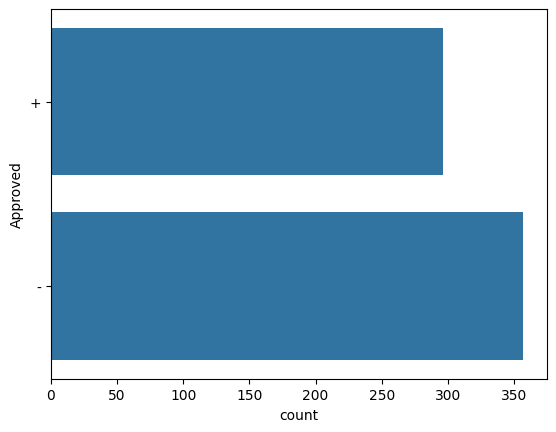

In [48]:
sns.countplot(data=data['Approved'])
plt.show()

<ipython-input-49-c4954e360549>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


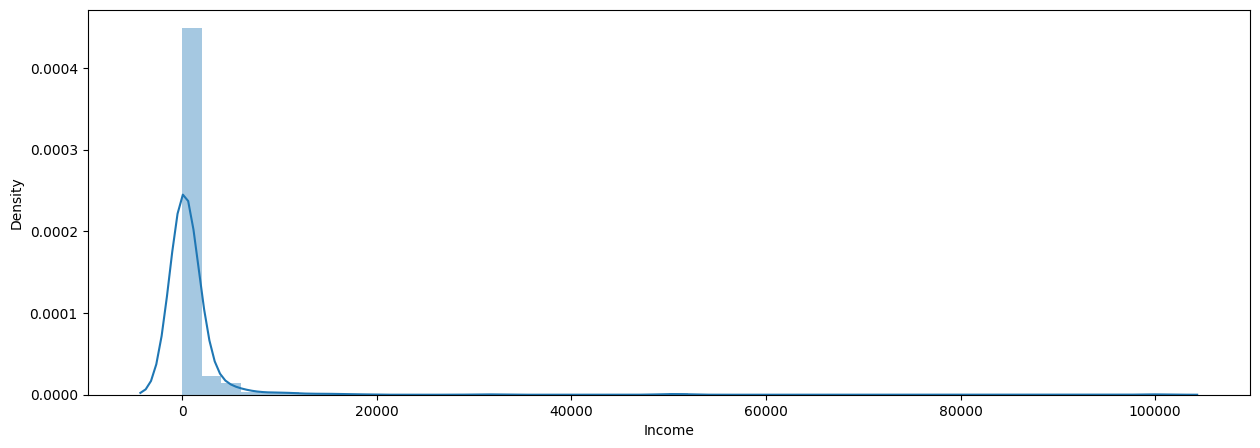

In [49]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Income'])
plt.show()

<ipython-input-50-123bc41fe593>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Debt'],color='r')


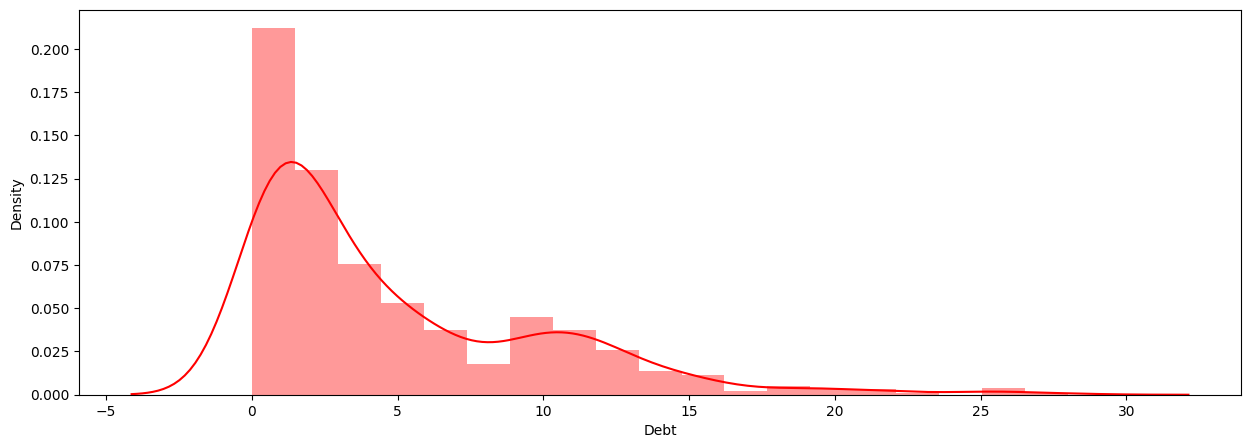

In [50]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Debt'],color='r')
plt.show()

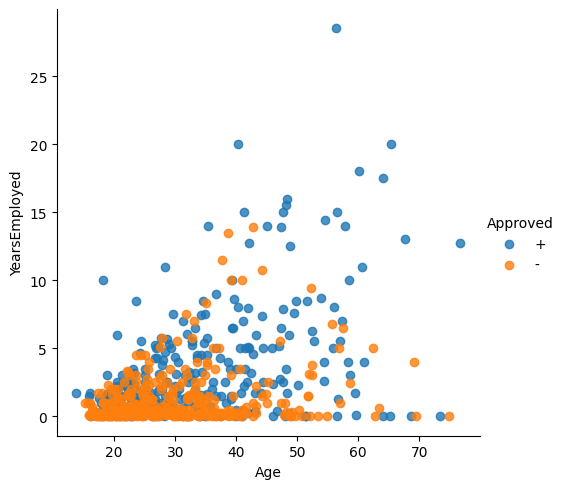

In [51]:
sns.lmplot(
    x="Age", y="YearsEmployed", data=data, hue="Approved", fit_reg=False
);

<Axes: xlabel='Gender', ylabel='count'>

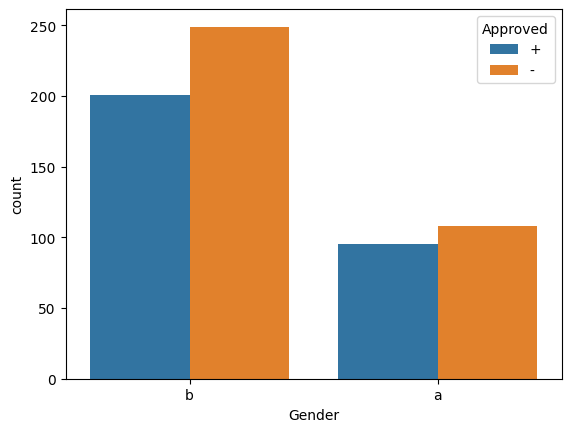

In [52]:
sns.countplot(x="Gender",hue="Approved",data=data)

In [53]:
print(data.groupby('Gender')['Approved'].count())

Gender
a    203
b    450
Name: Approved, dtype: int64


Correlation matrix

<Axes: >

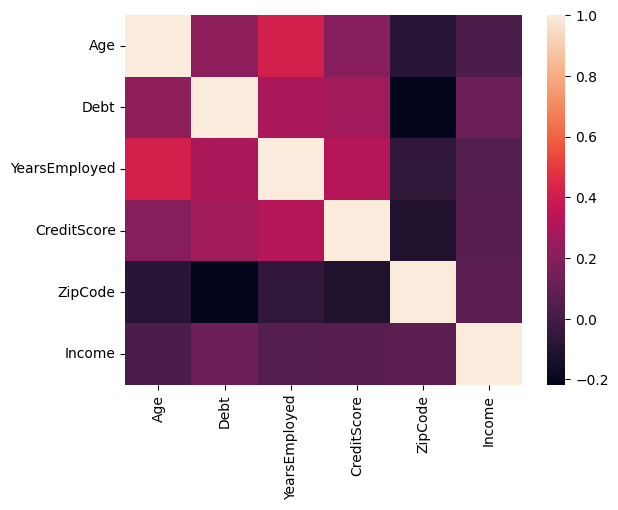

In [56]:
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: xlabel='EducationLevel', ylabel='count'>

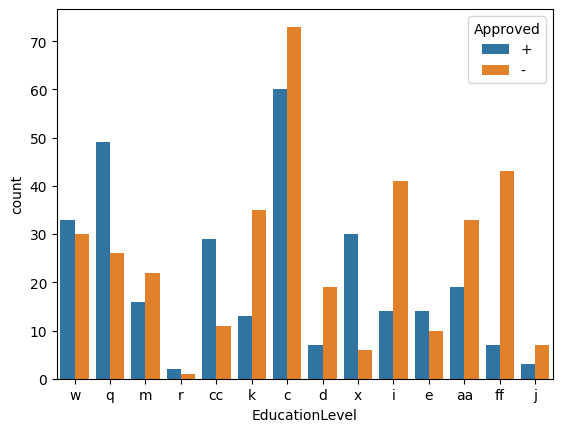

In [54]:
sns.countplot(x="EducationLevel",hue="Approved",data=data)

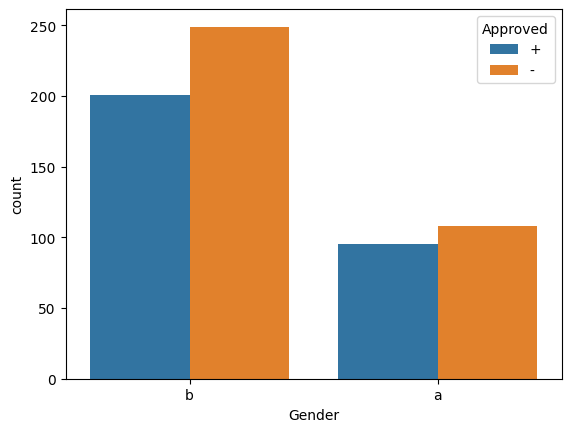

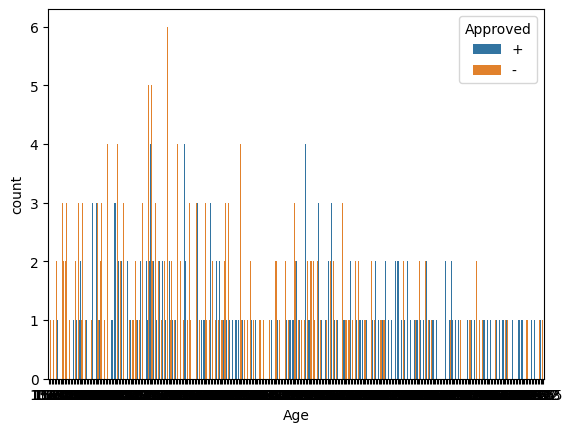

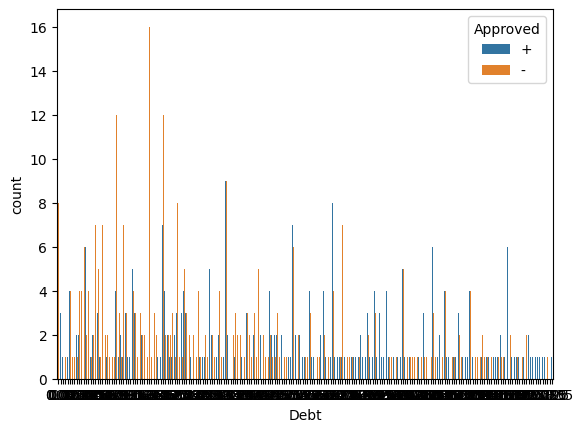

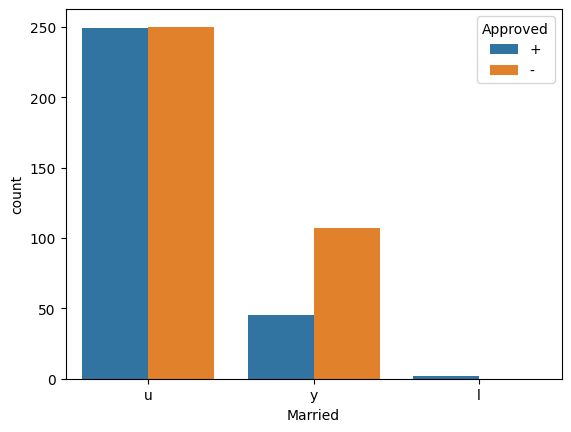

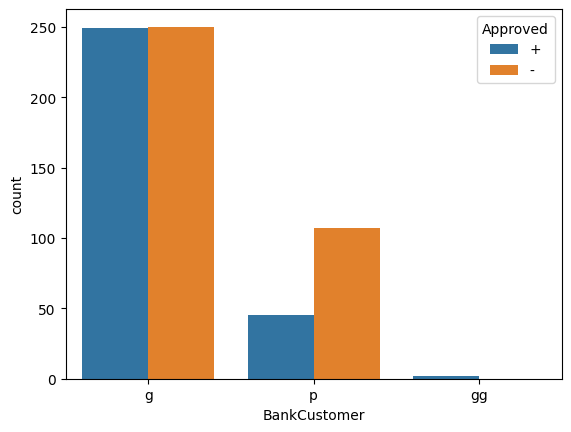

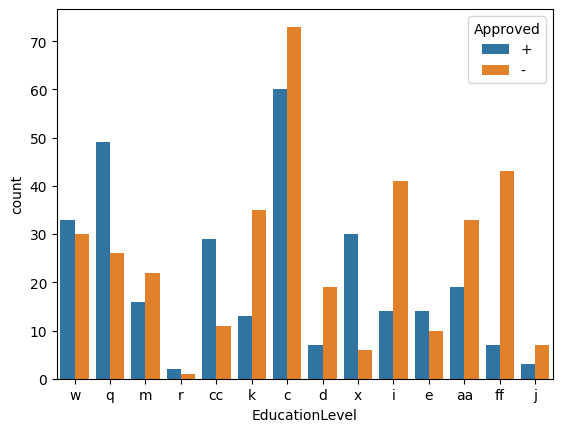

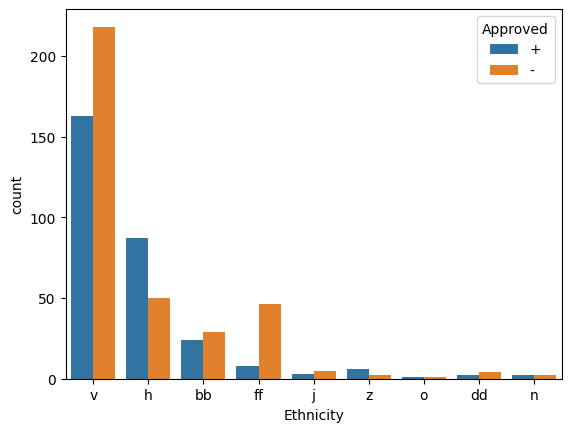

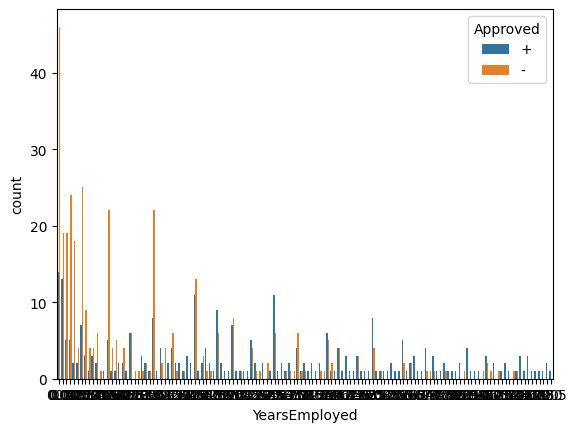

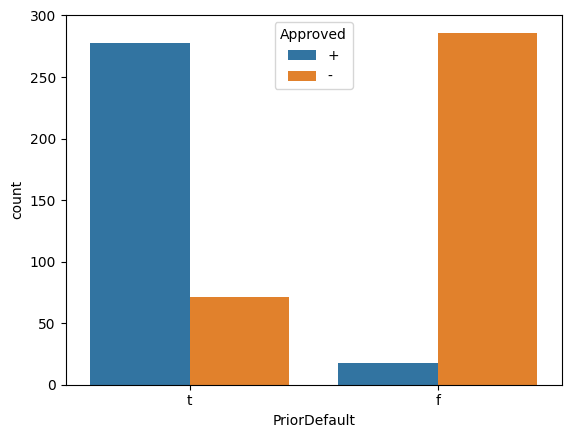

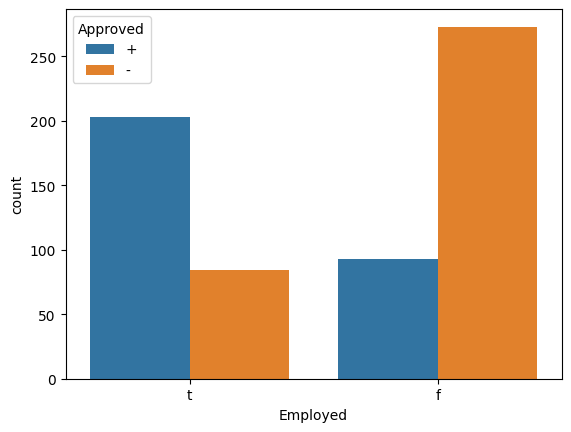

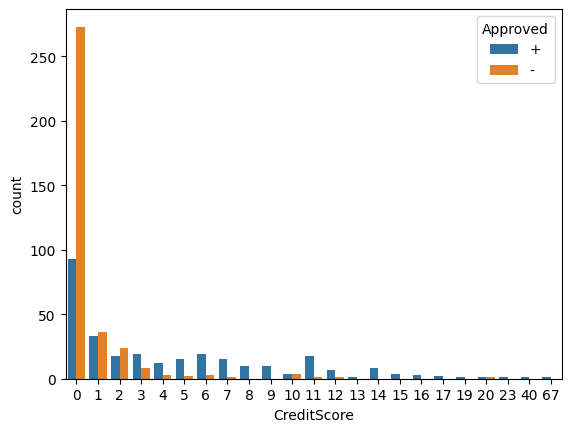

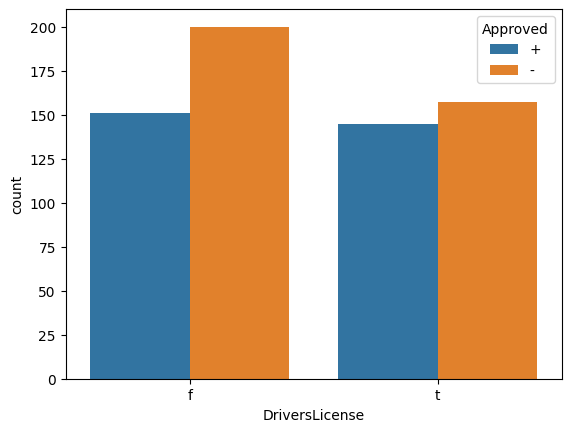

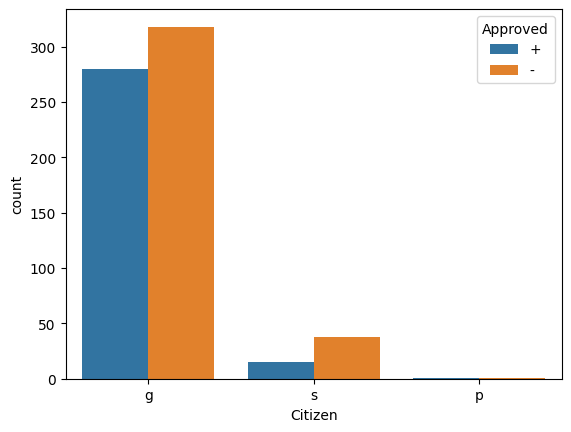

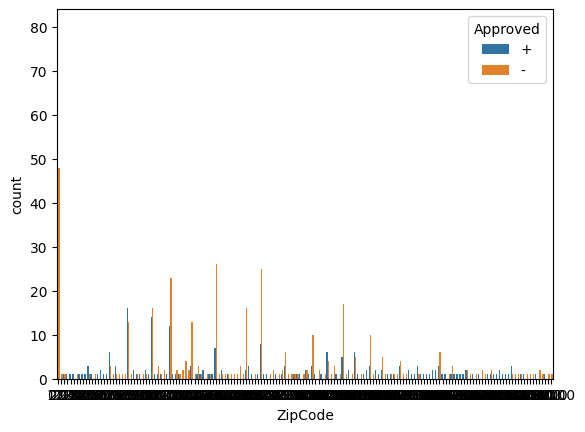

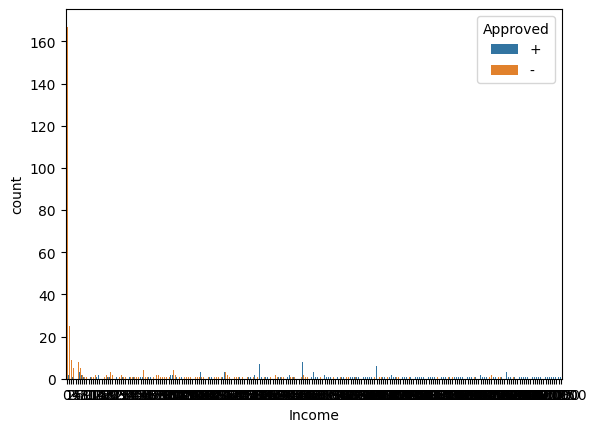

In [55]:
for i,predictor in enumerate(data.drop(columns='Approved')):
    plt.figure(i)
    sns.countplot(data=data,x=predictor,hue='Approved')